In [167]:
import jieba;
jieba.enable_paddle();

import copy;
import math;

def tridf(infilename):
    doc_list={};
    with open(infilename,"rt",encoding='utf-8') as ifile:
        for line in ifile :
            list_of_line=jieba.cut(line);
            doc_list[line]=list_of_line; 
    result=scan_doc_list(doc_list);
    return result;
#tridf ends

def scan_doc_list(inlist):
    docs={
        "total_doc_count":0,
        "total_word_count":0,
        "stat":{},# word -> {count,idf}
        "doc":{}#line -> doc
    };
    
    #scan every doc in lista
    for line,line_of_list in inlist.items():
        doc=scan_doc(line,line_of_list);
        docs["doc"][line]=doc;
        #merge stat loop
        for word,info in doc["stat"].items():
            if word in docs["stat"]:
                docs["stat"][word]["count"]+=doc["stat"][word]["count"];
            else:
                docs["stat"][word]={};
                docs["stat"][word]["name"]=word;
                docs["stat"][word]["count"]=copy.deepcopy(doc["stat"][word]["count"]);
        #end of merge loop
        docs["total_doc_count"]+=1;
        docs["total_word_count"]+=doc["total_word_count"];
    #end of scan
    
    for word,info in docs["stat"].items():
        info["idf"]=math.log((docs["total_word_count"]*docs["total_doc_count"])/(info["count"]),10);
    #end of idf cal
    
    for word,doc in docs["doc"].items():
        for word,info in doc["stat"].items():
            tr=(info["count"])/(doc["total_word_count"]);
            idf=docs["stat"][word]["idf"];
            info["tfidf"]=(tr)*(idf);
        #end of a word
    #end of a doc
    return docs;
#end of scan_doc_list

def scan_doc(inname,inlist):
    doc={
        "name":inname,
        "total_word_count":0,
        "stat":{}# word -> {count,idf}
    };
    
    #scan thorogh list
    for word in inlist:
        if word in doc["stat"]:
            doc["stat"][word]["count"]+=1;
        else:
            doc["stat"][word]={};
            doc["stat"][word]["name"]=word;
            doc["stat"][word]["source"]=inname;
            doc["stat"][word]["count"]=1;
        doc["total_word_count"]+=1;
    #end of loop
   
    return doc;
#end of scan_doc



if False:
    '''
with open("./output.txt","x",encoding='utf-8') as ifile:
    print("opened!");
    log=str(tridf("./hw1-dataset.txt")["stat"])
    print("calculated!");
    ifile.write(log);
print("done!");
    '''
result=tridf("./hw1-dataset.txt");
#result=tridf("./test.txt");
print("done!");

Paddle enabled successfully......


done!


In [168]:
print(result["total_word_count"]);

8253753


In [169]:
result["total_doc_count"]

415845

In [170]:
stat=result["stat"];
stat_view=sorted(stat.items(),reverse=True,key=lambda i:i[1]["count"]);
print(stat_view[0:100]);

[('\t', {'name': '\t', 'count': 415845, 'idf': 6.9166514681345515}), ('\n', {'name': '\n', 'count': 415845, 'idf': 6.9166514681345515}), ('的', {'name': '的', 'count': 315956, 'idf': 7.0359563451296925}), (' ', {'name': ' ', 'count': 292864, 'idf': 7.068916962385262}), ('有', {'name': '有', 'count': 201318, 'idf': 7.231700344919767}), ('?', {'name': '?', 'count': 160683, 'idf': 7.329613020610023}), ('？', {'name': '？', 'count': 160003, 'idf': 7.331454826552996}), ('是', {'name': '是', 'count': 100049, 'idf': 7.535370199978011}), ('沒', {'name': '沒', 'count': 93068, 'idf': 7.566782570983243}), ('嗎', {'name': '嗎', 'count': 89398, 'idf': 7.5842551492271}), ('，', {'name': '，', 'count': 89075, 'idf': 7.585827121131063}), ('八卦', {'name': '八卦', 'count': 78508, 'idf': 7.640669038353705}), ('了', {'name': '了', 'count': 76942, 'idf': 7.649419481157133}), ('都', {'name': '都', 'count': 63742, 'idf': 7.731157266167689}), ('你', {'name': '你', 'count': 62583, 'idf': 7.739126574356765}), ('人', {'name': '人', 'cou

In [171]:
def get_doc_stat_list(indoc):
    stat=[];
    for line,doc in indoc.items():
            stat.extend(doc["stat"].values())
    return stat;
full_stat=get_doc_stat_list(result["doc"])
fstat_view=sorted(full_stat,reverse=True,key=lambda i:i["tfidf"]);
print(fstat_view[0:100]);

[{'name': '咩', 'source': '咩～\t咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩咩\n', 'count': 25, 'tfidf': 8.715889738547252}, {'name': '嘿嘿', 'source': '嘿嘿嘿嘿 ?\t嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿嘿\n', 'count': 12, 'tfidf': 8.052181802025402}, {'name': '鞥', 'source': '鞥這個字\t鞥鞥鞥鞥鞥鞥鞥鞥鞥鞥鞥\n', 'count': 12, 'tfidf': 7.849842073541152}, {'name': '▍', 'source': '▍▍▍▍▍▍▍迪馬希▍▍▍▍▍▍▍▍▍\t擅長聲音的朋友\n', 'count': 16, 'tfidf': 7.83083780953133}, {'name': '卍', 'source': '卍注音已經變綁丐了\t卍卍卍卍卍卍卍卍卍卍卍卍卍卍卍卍卍卍\n', 'count': 19, 'tfidf': 7.816843975650783}, {'name': '喵', 'source': '苗看多會變成什麼\t喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵喵\n', 'count': 24, 'tfidf': 7.689456793060334}, {'name': '噢', 'source': '噢噢噢噢噢噢噢噢噢噢!!\t噢噢噢噢噢噢噢噢噢…結冰惹\n', 'count': 19, 'tfidf': 7.620734102600718}, {'name': '嫑', 'source': '不要不要 是否過譽了?\t嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑嫑\n', 'count': 24, 'tfidf': 7.523819093806417}, {'name': '國國國', 'source': '國國國國國國國國國國國國國國國國國國國\t國國國國國國國國國國國國國國國國國國國國國民黨工\n', 'count': 11, 'tfidf': 7.32515393491291}, {'name': '﹎', 'source': '﹎﹎﹎﹎﹎﹎﹎﹎﹎﹎﹎﹎﹎﹎\t此線對折有好笑到\n', 'count': 14, 'tfidf': 7

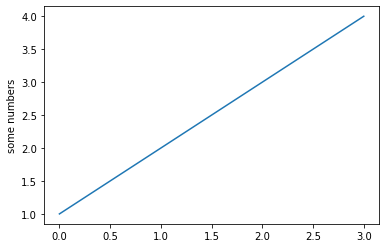

In [172]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


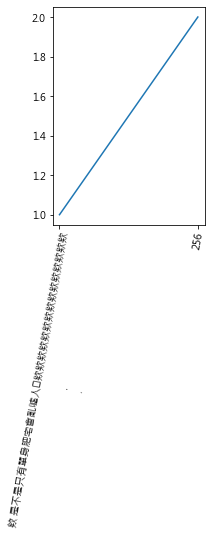

In [229]:
def clear_text(intext):
    return '\\$'.join((' '.join(intext.split())).split('$'));

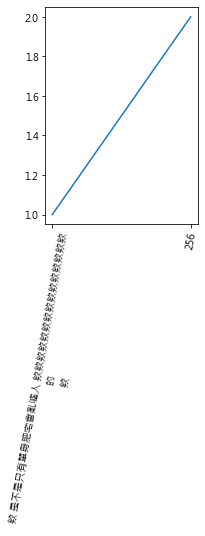

In [213]:
#plt.rcParams['font.sans-serif']="Microsoft JhengHei";
#plt.rcParams['font.sans-serif']="DFKai-SB";
test_x=[clear_text("欸 是不是只有單身肥宅會亂噓人\t欸欸欸欸欸欸欸欸欸欸欸欸欸欸欸\n")+"\n的\n"+clear_text("欸"),"256"]
test_y=[1,2]

plt.subplot(1,2,1)
#plt.axis(0,2,0,2)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.plot(test_x,test_y)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8759 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8759 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9786 missing from current font.
  font.set_text(s, 0, flags=flags)


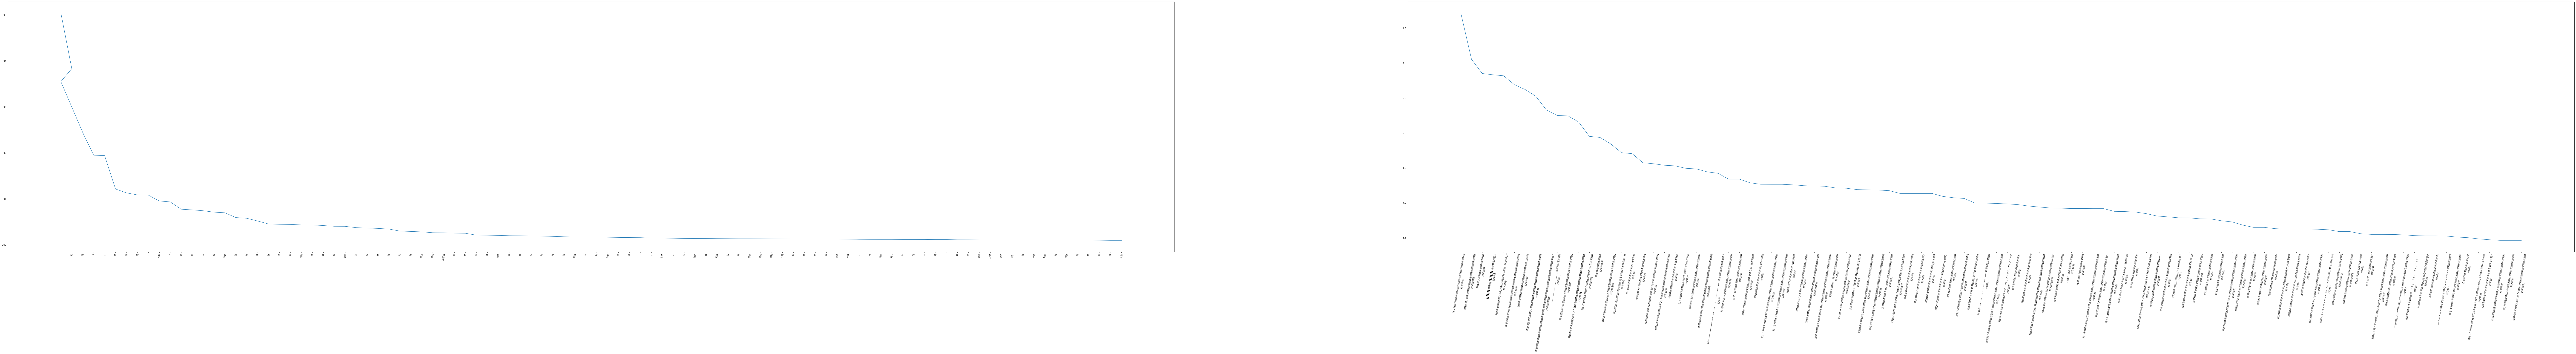

In [232]:
fig1={"x":[],"y":[]};
fig2={"x":[],"y":[]};
plt.rcParams["figure.figsize"] = (200,20)
for entry in stat_view[0:100]:
    fig1["x"].append(clear_text(entry[0]));
    fig1["y"].append(entry[1]["count"]/result["total_word_count"]);
plt.subplot(1,2,1)
#plt.axis(0,2,0,2)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.plot(fig1["x"],fig1["y"])
for entry in fstat_view[0:100]:
    fig2["x"].append(clear_text(entry["source"])+"\n的字詞:"+clear_text(entry["name"]));
    fig2["y"].append(entry["tfidf"]);
plt.subplot(1,2,2)
#plt.axis(0,2,0,2)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.plot(fig2["x"],fig2["y"])
plt.show()

In [2]:
i=[];
i[5]=12;
print(i);

IndexError: list assignment index out of range